In [11]:
import pickle as pkl
import tensorflow as tf
fid = open('data/experiment/BSDS500/experiment1/times/ML_FISTA_initial_model.ckpt.pklML_FISTA_lpstz64.0_iter16_times.pkl','rb')
outputs_csc = pkl.load(fid)
outputs_jpeg_art_removal = pkl.load(fid)
times_fista = pkl.load(fid)
fid.close()
print(len(outputs_csc))
print(sum(outputs_csc[1:])/len(outputs_csc[1:])/16)
print(outputs_jpeg_art_removal.shape)
print(len(times_fista))

1575
4.213231517513181
(2048, 32, 32, 3)
1575


In [9]:
import pickle as pkl
import tensorflow as tf
fid = open('data/experiment/BSDS500/experiment1/times/ML_FISTA_initial_model.ckpt.pklML_FISTA_lpstz64.0_iter48_times.pkl','rb')
outputs_csc = pkl.load(fid)
outputs_jpeg_art_removal = pkl.load(fid)
times_fista = pkl.load(fid)
fid.close()
print(sum(outputs_csc[1:])/len(outputs_csc[1:])/16)
print(outputs_jpeg_art_removal.shape)
print(len(times_fista))

0.1957255789735459
(2048, 32, 32, 3)
1575


This isn't dealing with an ideal stepsize, but ADMM with rho = 1 significantly outperforms FISTA with L = 100.

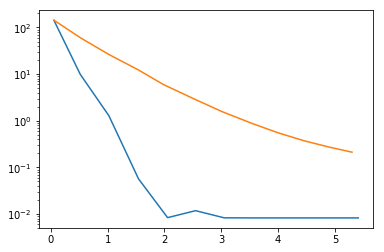

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.plot(np.array(t_admm), np.array(f_admm))
plt.plot(np.array(t_fista),np.array(f_fista))
plt.yscale('log')
plt.show()

In [1]:
import pickle as pkl

f_fista = []
t_fista = []
for log2lpstz in range(0,18,3):
    f_fista_temp = []
    t_fista_temp = []
    for ii in range(0,48,4):
        fid = open('data/experiment/BSDS500/experiment1/times/ML_FISTA_lpstz' + str(2**log2lpstz) + '_iter' + str(ii) + '_times.pkl','rb')
        outputs_fista = pkl.load(fid)
        times_fista = pkl.load(fid)
        fid.close()
        f_fista_temp.append(sum(outputs_fista[1:])/(len(outputs_fista) - 1))
        t_fista_temp.append(sum(times_fista[1:])/(len(outputs_fista) - 1))
    f_fista.append(f_fista_temp)
    t_fista.append(t_fista_temp)
    


In [2]:
print(len(t_fista))

6


This was a broad search on FISTA. L = 1 and L = 8 diverge. L = 64 shows decent convergence, but is still significantly outperformed by FISTA.

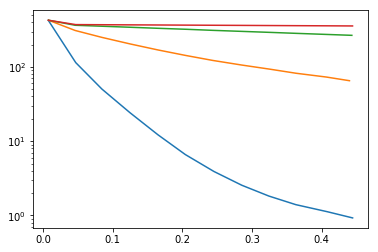

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for ii in range(2,len(t_fista)):
    plt.plot(np.array(t_fista[ii]),np.array(f_fista[ii]))
plt.yscale('log')
plt.show()

In [6]:
import pickle as pkl

f_admm = []
t_admm = []
for log2rho in range(-6,12,3):
    f_admm_temp = []
    t_admm_temp = []
    for ii in range(0,48,4):
        fid = open('data/experiment/BSDS500/experiment1/times/ML_ADMM_rho' + str(2**log2rho) + '_iter' + str(ii) + '_times.pkl','rb')
        outputs_admm = pkl.load(fid)
        times_admm = pkl.load(fid)
        fid.close()
        f_admm_temp.append(sum(outputs_admm[1:])/(len(outputs_admm) - 1))
        t_admm_temp.append(sum(times_admm[1:])/(len(outputs_admm) - 1))
    f_admm.append(f_admm_temp)
    t_admm.append(t_admm_temp)
    

There was a bug in my code that yielded the wrong lambda. For this reason, the initializations don't all match. There may also be something wrong with the data.  It's an old dataset, and I may have subsequently changed how the data is supposed to be handled. As in the later example, ADMM is behaving oddly for rho = 0.125. I am not sure why. Note the smaller rho = 0.015625 appears to have a similar issue, just later in the curve.

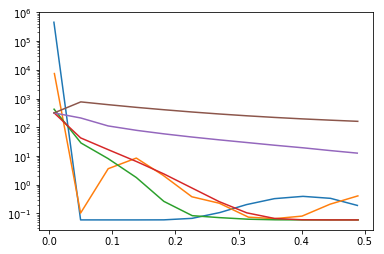

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for ii in range(len(t_admm)):
    plt.plot(np.array(t_admm[ii]),np.array(f_admm[ii]))
plt.yscale('log')
plt.show()

In [1]:
import pickle as pkl

f_fista = []
t_fista = []
for log2lpstz in range(7,18,1):
    f_fista_temp = []
    t_fista_temp = []
    for ii in range(0,48,4):
        fid = open('data/experiment/BSDS500/experiment1/times/ML_FISTA_lpstz' + str(2**(log2lpstz/2)) + '_iter' + str(ii) + '_times.pkl','rb')
        outputs_fista = pkl.load(fid)
        times_fista = pkl.load(fid)
        fid.close()
        f_fista_temp.append(sum(outputs_fista[1:])/(len(outputs_fista) - 1))
        t_fista_temp.append(sum(times_fista[1:])/(len(outputs_fista) - 1))
    f_fista.append(f_fista_temp)
    t_fista.append(t_fista_temp)

FISTA shows a gradual delay in convergence as the reciprocal of stepsize increases. L = 8 diverges, so this plot starts at L = 8*sqrt(2). Data is old and may be incorrect format.

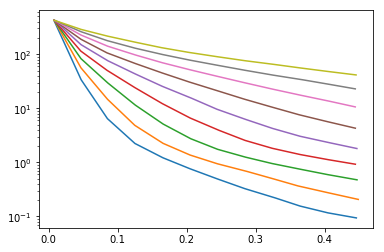

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for ii in range(2,len(t_fista)):
    plt.plot(np.array(t_fista[ii]),np.array(f_fista[ii]))
plt.yscale('log')
plt.show()

In [1]:
import pickle as pkl

f_fista = []
t_fista = []
for log2lpstz in range(7,11,1):
    f_fista_temp = []
    t_fista_temp = []
    for ii in range(0,48,4):
        fid = open('data/experiment/simpleTest/experiment1/times/ML_FISTA_lpstz' + str(2**(log2lpstz/2)) + '_iter' + str(ii) + '_times.pkl','rb')
        outputs_fista = pkl.load(fid)
        times_fista = pkl.load(fid)
        fid.close()
        f_fista_temp.append(sum(outputs_fista[1:])/(len(outputs_fista) - 1))
        t_fista_temp.append(sum(times_fista[1:])/(len(outputs_fista) - 1))
    f_fista.append(f_fista_temp)
    t_fista.append(t_fista_temp)

I searched more values for the Lipschitz constant, but these below are the best. Convergence at best occurs around 40-48 iterations. Convergence takes a bit longer for larger constants (corresponding to larger step sizes), but sensitivity appears to be fairly low. However, if the constant becomes too small, the result no longer converges.

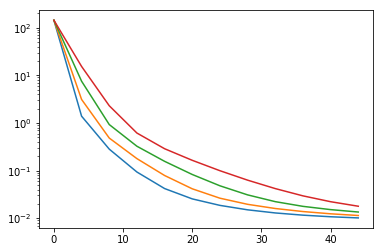

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for ii in range(len(t_fista)):
    plt.plot([4*jj for jj in range(len(f_fista[ii]))],f_fista[ii])
plt.yscale('log')
plt.show()

In [1]:
import pickle as pkl

f_admm = []
t_admm = []
for log2rho in range(-6,6,3):
    f_admm_temp = []
    t_admm_temp = []
    for ii in range(0,48,4):
        fid = open('data/experiment/simpleTest/experiment1/times/ML_ADMM_rho' + str(2**log2rho) + '_iter' + str(ii) + '_times.pkl','rb')
        outputs_admm = pkl.load(fid)
        times_admm = pkl.load(fid)
        fid.close()
        f_admm_temp.append(sum(outputs_admm[1:])/(len(outputs_admm) - 1))
        t_admm_temp.append(sum(times_admm[1:])/(len(outputs_admm) - 1))
    f_admm.append(f_admm_temp)
    t_admm.append(t_admm_temp)

Using a similar cell type for ADMM, I see a strange behavior.  One of the curves is very irratic. I can only speculate this has to do with boundary handling.

Hopefully, if rho is sufficiently large, this problem is avoided.

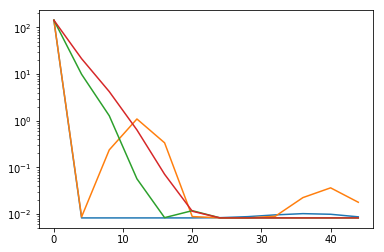

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for ii in range(len(t_admm)):
    plt.plot([4*jj for jj in range(len(f_admm[ii]))],np.array(f_admm[ii]))
plt.yscale('log')
plt.show()